## Continuous Anomaly Detection
#### Corey Solitaire
`11-03-2020`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Import Lemonade Dataset

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# explore df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
# explore df
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


***

#### Split df 

In [5]:
from sklearn.model_selection import train_test_split

def split_df(df):
    '''
    This function splits our dataframe in to train, validate, and test
    '''
    # split dataset
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
    return train, validate, test   

train,validate,test = split_df(df)
train.shape, validate.shape,test.shape

((204, 7), (88, 7), (73, 7))

***

#### Visualize

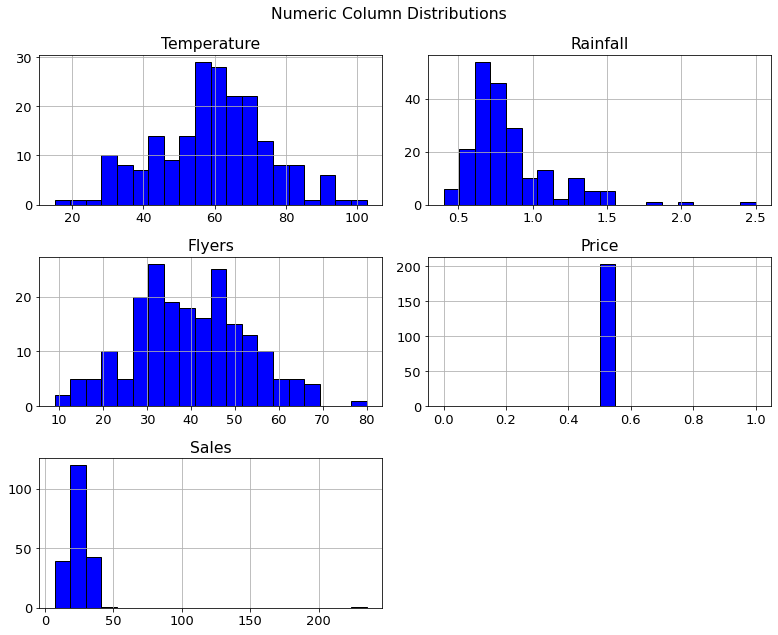

In [6]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='blue', ec='black')
    plt.suptitle('Numeric Column Distributions')
    plt.tight_layout()
    plt.show()
    
numeric_hists(train)

***

**Takeaway:**
`All features appear to be normally distributed.  This means that I could use the IQR or Imperical Rule to explore for outliers.  I will IQR because it works equally well for data regardless of the distribution.`

***

## Exercises:

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [24]:

def get_lower_and_upper_bounds(s, k):  
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    return upper_bound, lower_bound

get_upper_outliers(train.Temperature, k=1.5)

(100.1, 20.29999999999999)

***

**Takeaway:**
`This function will provide the lower and upper bounds for a series in the df.`

***

In [8]:
def get_upper_outliers(s, k):  
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)
    return df

add_upper_outlier_columns(train, k=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outliers,Rainfall_outliers,Flyers_outliers,Price_outliers,Sales_outliers
224,8/13/17,Sunday,67.7,0.65,54,0.5,29,0.0,0.00,0.0,0.0,0.0
344,12/11/17,Monday,45.1,1.11,33,0.5,17,0.0,0.00,0.0,0.0,0.0
339,12/6/17,Wednesday,44.7,0.95,28,0.5,19,0.0,0.00,0.0,0.0,0.0
93,4/4/17,Tuesday,62.1,0.71,31,0.5,27,0.0,0.00,0.0,0.0,0.0
81,3/23/17,Thursday,55.9,0.87,35,0.5,23,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,0.0,0.27,0.0,0.0,0.0
317,11/14/17,Tuesday,55.9,0.80,28,0.5,23,0.0,0.00,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.06,0.0,0.0,0.0
268,9/26/17,Tuesday,61.8,0.77,51,0.5,26,0.0,0.00,0.0,0.0,0.0


In [9]:
train.shape

(204, 12)

In [10]:
#This text prints information regrding the outlier columns created

add_upper_outlier_columns(train, k=1.5)    
outlier_cols = [col for col in train if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = train[col][train[col] > 0]
    print(data.describe())

~~~
Temperature_outliers
count    1.0
mean     2.5
std      NaN
min      2.5
25%      2.5
50%      2.5
75%      2.5
max      2.5
Name: Temperature_outliers, dtype: float64
~~~
Rainfall_outliers
count    18.000000
mean      0.275556
std       0.296255
min       0.060000
25%       0.085000
50%       0.160000
75%       0.270000
max       1.230000
Name: Rainfall_outliers, dtype: float64
~~~
Flyers_outliers
count    1.0
mean     4.0
std      NaN
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
Name: Flyers_outliers, dtype: float64
~~~
Price_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Price_outliers, dtype: float64
~~~
Sales_outliers
count      2.000000
mean      97.500000
std      136.471609
min        1.000000
25%       49.250000
50%       97.500000
75%      145.750000
max      194.000000
Name: Sales_outliers, dtype: float64
~~~
Temperature_outliers_outliers
count    1.0
mean     2.5
std      NaN
min

In [11]:
train = train[train.columns.drop(list(train.filter(regex='_outliers')))]
train.shape

(204, 7)

***

**Takeaway:**
`This function uses the bounds to create columns that can be used to sort/filter data.`

***

### 2. Using lemonade.csv dataset and focusing on continuous variables:

#### 2a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

#### 2b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

#### 2c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

#### 2d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

### 3. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns: 

#### Use a 2 sigma decision rule to isolate the outliers.   

    - Do these make sense?   
    
    - Should certain outliers be kept or removed?   


### 4. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv